# <center> **CARD FRAUD DETECTION IN MACHINE LEARNING** </center>

<p align="center">
  <img src="https://dataaspirant.com/wp-content/uploads/2020/09/3-Credit-Card-Fraud-Detection.png" alt="Sublime's custom image"/>
</p>

## Abstract
...

## About the Dataset
The dataset contains approximately 6,362,620 transactions made through various forms of online payments. Among these, about 8,213 transactions are fraudulent, indicating that this is a highly imbalanced dataset.

This dataset includes the following fields:

-   **step**: represents a unit of time where 1 step equals 1 hour
-   **type**: type of online transaction
-   **amount**: the amount of the transaction
-   **nameOrig**: customer starting the transaction
-   **oldbalanceOrg**: balance before the transaction
-   **newbalanceOrig**: balance after the transaction
-   **nameDest**: recipient of the transaction
-   **oldbalanceDest**: initial balance of the recipient before the transaction
-   **newbalanceDest**: the new balance of the recipient after the transaction
-   **isFraud**: fraud transaction

Among these fields, we will only use the necessary data and exclude columns such as 'nameOrig', 'nameDest', and 'isFlaggedFraud' for our processing.


## Process
1. Importing Libraries & Loading Datasets.

2. Data Preprocessing & Preparing Datasets.

3. Exploratoty Data & Visualization.

4. Handling Imbalanced Datasets.

5. Conclusions.

6. Further Enhancements.

7. Acknowledgement and References.

## Step 1: Importing Libraries & Loading Dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
dataset_main = pd.read_csv("Dataset/PS_20174392719_1491204439457_log.csv")

dataset_main.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


## Step 2: Data exploration and Data preparation

In [44]:
if dataset_main.isna().any().any():
    print("Missing Values in Dataframe!")
else:
    print(dataset_main.isna().sum())

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


In [4]:
dataset_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [45]:
dataset_main.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


Dropping the 'nameOrig', 'nameDest', and 'isFlaggedFraud'

In [6]:
dataset_main.drop('nameOrig', axis=1, inplace=True)
dataset_main.drop('nameDest', axis=1, inplace=True)
dataset_main.drop('isFlaggedFraud', axis=1, inplace=True)

In [7]:
dataset_main.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.0,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.0,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.0,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.0,0.00,0
5,1,PAYMENT,7817.71,53860.00,46042.29,0.0,0.00,0
6,1,PAYMENT,7107.77,183195.00,176087.23,0.0,0.00,0
7,1,PAYMENT,7861.64,176087.23,168225.59,0.0,0.00,0
8,1,PAYMENT,4024.36,2671.00,0.00,0.0,0.00,0
9,1,DEBIT,5337.77,41720.00,36382.23,41898.0,40348.79,0


In [8]:
# Kiểm tra các hàng trùng lặp (tất cả các cột)
duplicates = dataset_main.duplicated()

# Đếm số lượng các hàng trùng lặp
num_duplicates = duplicates.sum()
print(f'Số lượng các hàng trùng lặp: {num_duplicates}')

# Hiển thị các hàng trùng lặp (nếu có)
if num_duplicates > 0:
    print('Các hàng trùng lặp:')
    print(dataset_main[duplicates])
else:
    print('Không có hàng trùng lặp nào trong dataset.')

Số lượng các hàng trùng lặp: 543
Các hàng trùng lặp:
         step      type       amount  oldbalanceOrg  newbalanceOrig  \
11104       7   PAYMENT      1849.50            0.0             0.0   
33556       8   PAYMENT      7759.31            0.0             0.0   
59969       9   PAYMENT      2388.93            0.0             0.0   
60763       9   PAYMENT     10042.85            0.0             0.0   
63096       9   PAYMENT      2783.83            0.0             0.0   
...       ...       ...          ...            ...             ...   
6281481   646  CASH_OUT  10000000.00     10000000.0             0.0   
6281485   646  CASH_OUT         0.00            0.0             0.0   
6351224   702  CASH_OUT  10000000.00     10000000.0             0.0   
6362455   730  CASH_OUT  10000000.00     10000000.0             0.0   
6362581   741  CASH_OUT  10000000.00     10000000.0             0.0   

         oldbalanceDest  newbalanceDest  isFraud  
11104               0.0             0.0    

In [46]:
dataset_main_clean = dataset_main.drop_duplicates()

# Kiểm tra lại để đảm bảo rằng các hàng trùng lặp đã được loại bỏ
duplicates_after = dataset_main_clean.duplicated()
num_duplicates_after = duplicates_after.sum()
print(f'Số lượng các hàng trùng lặp sau khi loại bỏ: {num_duplicates_after}')

Số lượng các hàng trùng lặp sau khi loại bỏ: 0


In [10]:
dataset_main_clean.value_counts()

step  type      amount      oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  isFraud
1     CASH_IN   270.78      4184966.65     4185237.43      3019.00         0.00            0          1
306   CASH_OUT  221317.77   0.00           0.00            872885.84       1094203.61      0          1
                221959.04   0.00           0.00            466584.88       688543.92       0          1
                221957.23   0.00           0.00            1076510.14      1298467.37      0          1
                221917.78   0.00           0.00            2479606.85      2701524.63      0          1
                                                                                                     ..
183   CASH_OUT  373389.48   264367.64      0.00            926693.24       1300082.72      0          1
                373282.66   103937.02      0.00            335909.19       709191.85       0          1
                373070.30   0.00           0.00            529048.18 

## Step 3: Exploratory Analyist & Visualization

In [47]:
dataset_main_clean['isFraud'].value_counts()

isFraud
0    6353880
1       8197
Name: count, dtype: int64

In [48]:
# Đếm số lượng giao dịch trong mỗi lớp
class_count_df = pd.DataFrame(dataset_main_clean['isFraud'].value_counts()).reset_index()
class_count_df.columns = ['Class', 'Counts']

class_count_df.value_counts()

Class  Counts 
0      6353880    1
1      8197       1
Name: count, dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_14372\1219225070.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Class', y='Counts', data=class_count_df, palette=custom_palette)


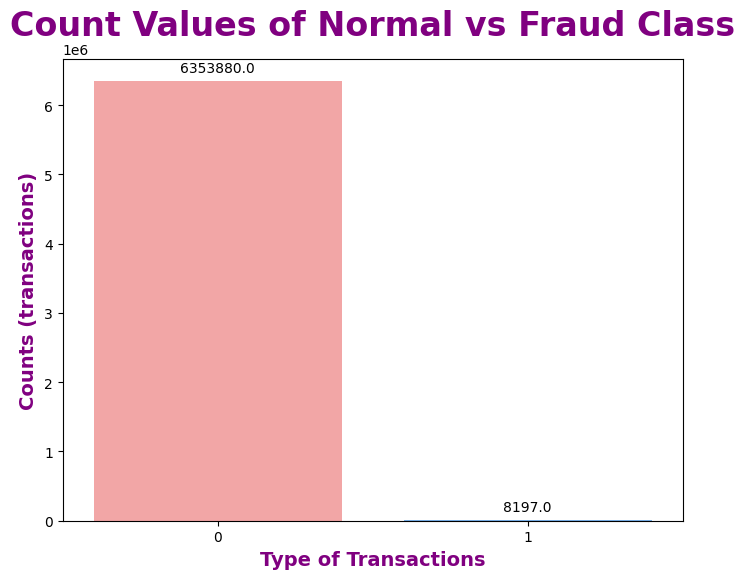

In [13]:
# Định nghĩa một bảng màu tùy chỉnh
custom_palette = ['#FF9999', '#66B2FF']

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Class', y='Counts', data=class_count_df, palette=custom_palette)
plt.xlabel(xlabel='Type of Transactions', fontsize=14, fontweight='bold').set_color('purple')
plt.ylabel(ylabel='Counts (transactions)', fontsize=14, fontweight='bold').set_color('purple')
plt.title(label='Count Values of Normal vs Fraud Class', fontsize=24, fontweight='bold').set_color('purple')

# Thêm số lượng lên trên các bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()

### Amount of Transaction money and Transactions Time


In [14]:
legit = dataset_main_clean[dataset_main_clean['isFraud'] == 0]
fraud = dataset_main_clean[dataset_main_clean['isFraud'] == 1]

In [15]:
legit.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.353880e+06,6.353880e+06,6.353880e+06,6.353880e+06,6.353880e+06,6.353880e+06,6353880.0
mean,2.432387e+02,1.782112e+05,8.328978e+05,8.560412e+05,1.101512e+06,1.225027e+06,0.0
std,1.421414e+02,5.962597e+05,2.887254e+06,2.925098e+06,3.399328e+06,3.673951e+06,0.0
min,1.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.560000e+02,1.337251e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.390000e+02,7.470091e+04,1.407878e+04,0.000000e+00,1.333911e+05,2.149631e+05,0.0
75%,3.340000e+02,2.083790e+05,1.069800e+05,1.447626e+05,9.442512e+05,1.112115e+06,0.0
max,7.180000e+02,9.244552e+07,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08,0.0


In [16]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,8197.000000,8.197000e+03,8.197000e+03,8.197000e+03,8.197000e+03,8.197000e+03,8197.0
mean,368.084665,1.452533e+06,1.634588e+06,1.927682e+05,5.453120e+05,1.263906e+06,1.0
std,216.354790,2.378653e+06,3.533088e+06,1.967566e+06,3.339589e+06,3.894747e+06,0.0
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
25%,181.000000,1.268486e+05,1.254644e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.0
50%,367.000000,4.388591e+05,4.382246e+05,0.000000e+00,0.000000e+00,1.842000e+03,1.0
75%,558.000000,1.503297e+06,1.503297e+06,0.000000e+00,1.480383e+05,1.049424e+06,1.0
max,743.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.0


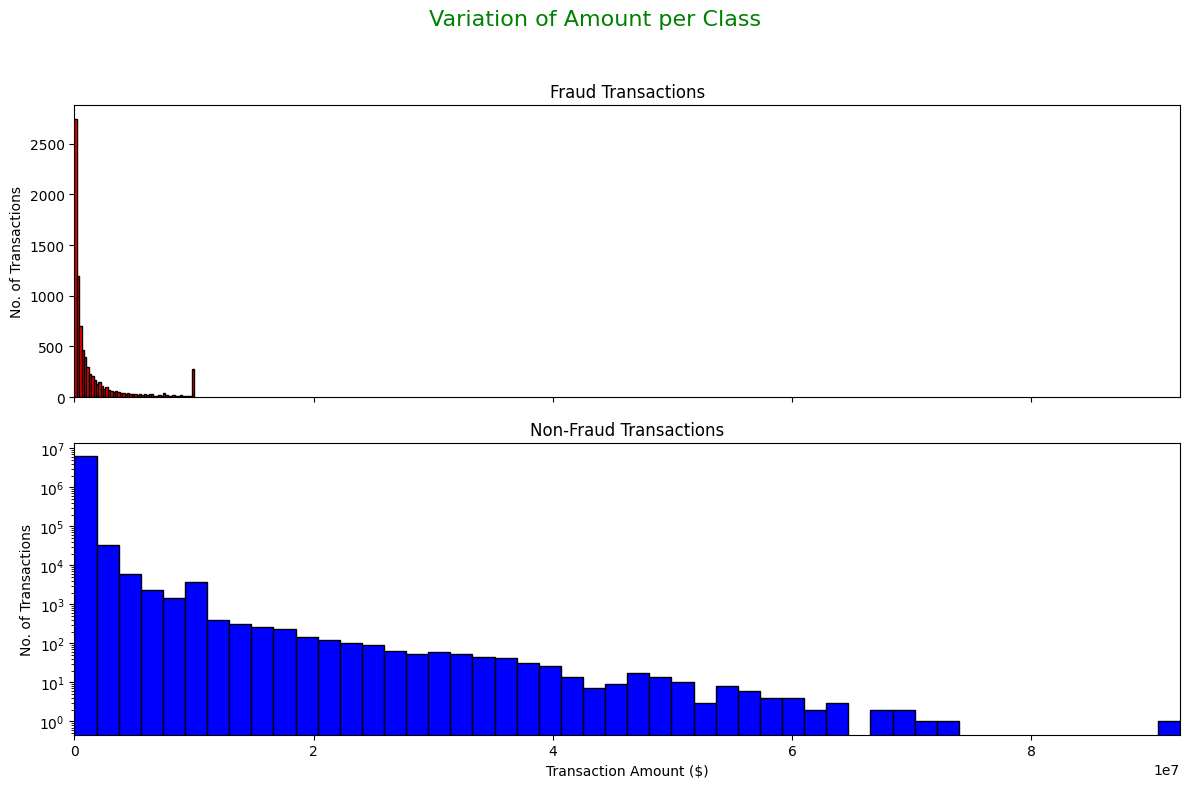

In [17]:
# Tạo subplots với 2 hàng và 1 cột, chia sẻ trục x
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))
fig.suptitle("Variation of Amount per Class", color='green', fontsize=16)
bins = 50  # Số lượng bins để có độ phân giải cao hơn

# Vẽ histogram cho các giao dịch gian lận
ax0.hist(fraud['amount'], bins=bins, color='red', edgecolor='black')
ax0.set_title('Fraud Transactions')
ax0.set_ylabel('No. of Transactions')

# Vẽ histogram cho các giao dịch không gian lận
ax1.hist(legit['amount'], bins=bins, color='blue', edgecolor='black')
ax1.set_title('Non-Fraud Transactions')
ax1.set_ylabel('No. of Transactions')

# Đặt giới hạn cho trục x
plt.xlim(0, 9.244552e+07)
plt.xlabel('Transaction Amount ($)')
plt.yscale('log')  # Sử dụng thang đo log cho trục y để dễ dàng so sánh

# Hiển thị biểu đồ
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Điều chỉnh bố cục để không chồng lên tiêu đề
plt.show()

In [18]:
fraud['type'].value_counts()

type
CASH_OUT    4100
TRANSFER    4097
Name: count, dtype: int64

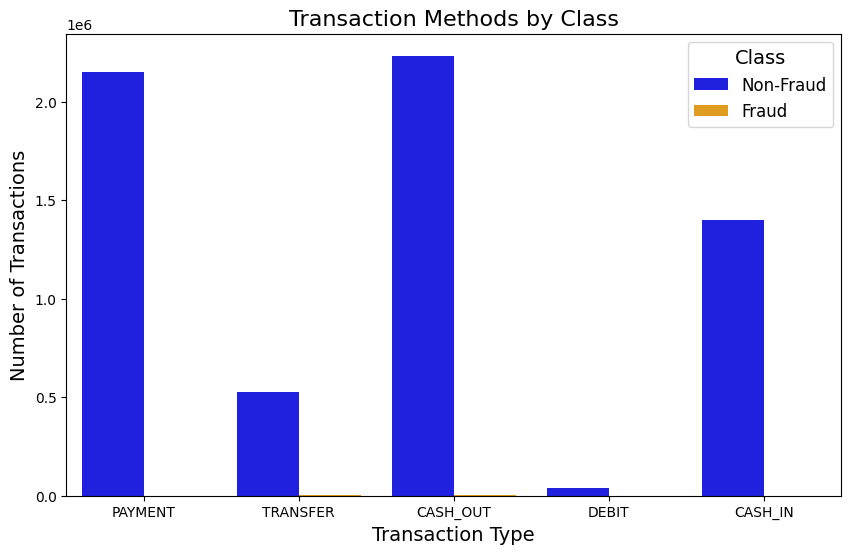

In [19]:
plt.figure(figsize=(10, 6))
plt.title("Transaction Methods by Class", fontsize=16)

# Sử dụng countplot để vẽ biểu đồ cho cả hai loại giao dịch
sns.countplot(x='type', hue='isFraud', data=dataset_main_clean, palette={0: "blue", 1: "orange"})

# Đặt nhãn cho trục x và trục y
plt.xlabel("Transaction Type", fontsize=14)
plt.ylabel("Number of Transactions", fontsize=14)

# Hiển thị chú thích (legend)
plt.legend(title="Class", title_fontsize='14', fontsize='12', labels=['Non-Fraud', 'Fraud'])

# Hiển thị biểu đồ
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_14372\3041829292.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=dataset_main_clean[dataset_main_clean['isFraud'] == 0], ax=ax0, palette='Blues')
C:\Users\admin\AppData\Local\Temp\ipykernel_14372\3041829292.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=dataset_main_clean[dataset_main_clean['isFraud'] == 1], ax=ax1, palette='Reds')


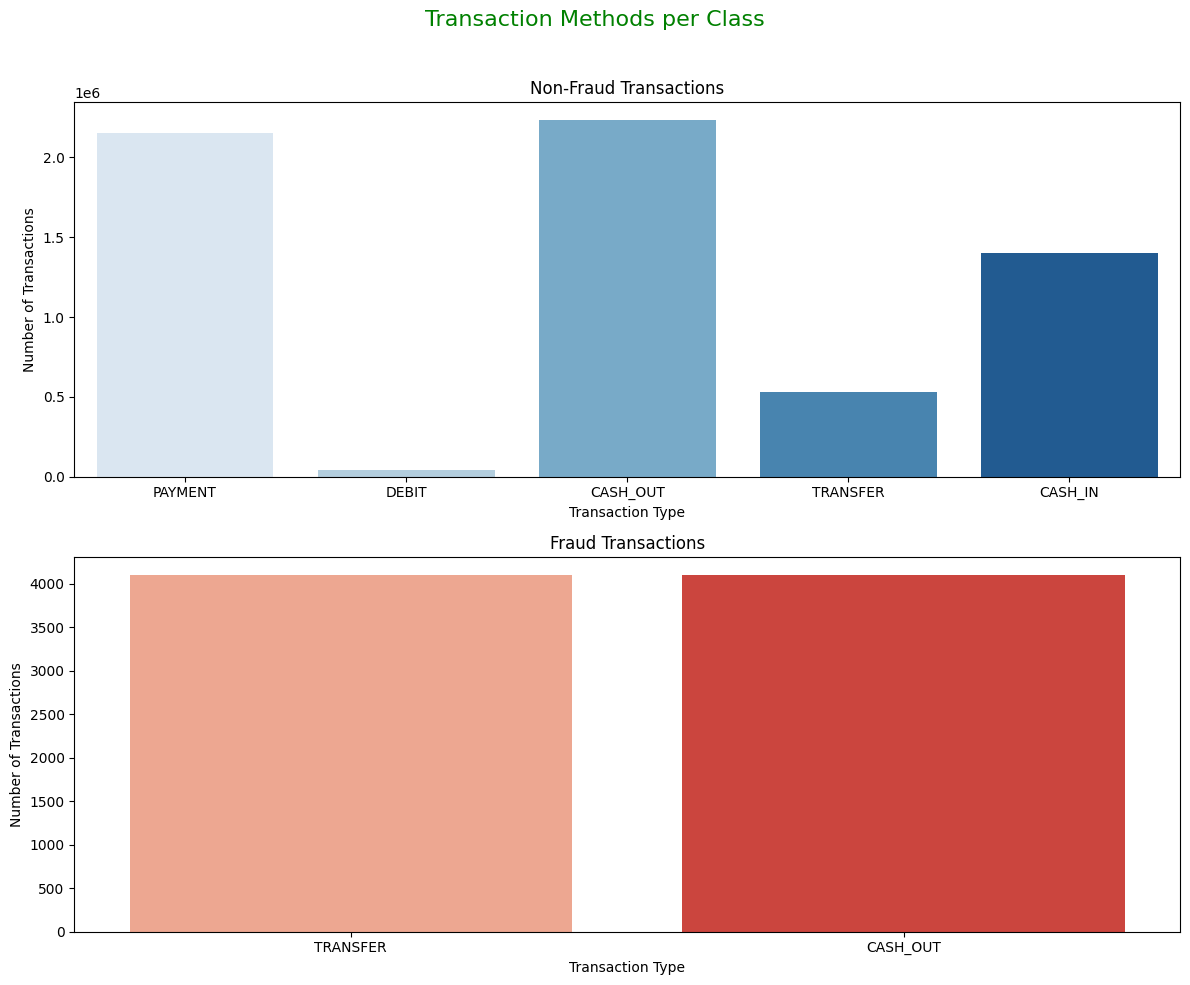

In [20]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
fig.suptitle("Transaction Methods per Class", fontsize=16, color='green')

# Vẽ biểu đồ đếm cho các giao dịch không gian lận
sns.countplot(x='type', data=dataset_main_clean[dataset_main_clean['isFraud'] == 0], ax=ax0, palette='Blues')
ax0.set_title('Non-Fraud Transactions')
ax0.set_xlabel('Transaction Type')
ax0.set_ylabel('Number of Transactions')

# Vẽ biểu đồ đếm cho các giao dịch gian lận
sns.countplot(x='type', data=dataset_main_clean[dataset_main_clean['isFraud'] == 1], ax=ax1, palette='Reds')
ax1.set_title('Fraud Transactions')
ax1.set_xlabel('Transaction Type')
ax1.set_ylabel('Number of Transactions')

# Hiển thị biểu đồ
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Điều chỉnh bố cục để các thành phần không bị chồng lấn lên tiêu đề chính
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

# Khởi tạo và fit LabelEncoder
label_encoder = LabelEncoder()
dataset_main_clean['type'] = label_encoder.fit_transform(dataset_main_clean['type'])

# Hiển thị danh sách các phương thức và số tương ứng
print("Các phương thức giao dịch và số tương ứng:")
for method, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{method}: {code}")

Các phương thức giao dịch và số tương ứng:
CASH_IN: 0
CASH_OUT: 1
DEBIT: 2
PAYMENT: 3
TRANSFER: 4


C:\Users\admin\AppData\Local\Temp\ipykernel_14372\3110390211.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_main_clean['type'] = label_encoder.fit_transform(dataset_main_clean['type'])


In [22]:
dataset_main_clean.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


## Step 4: Handeling Imbalanced Dataset


In a practical scenario, I will first split the data, using 80% for training and 20% for testing. First, I will balance the data on the training set. Then, I will use the original, unbalanced test set to evaluate the model.  
	

 - X_train, y_train: Use various methods to perform data balancing.

	

 - X_test, y_test: Still imbalanced - to evaluate the model.

In [23]:
X = dataset_main_clean.drop(columns=['isFraud'])
y = dataset_main_clean['isFraud']
print(y.value_counts())

isFraud
0    6353880
1       8197
Name: count, dtype: int64


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print(len(X_train), len(X_test))
print(y_train.value_counts())
print(y_test.value_counts())

5089661 1272416
isFraud
0    5083093
1       6568
Name: count, dtype: int64
isFraud
0    1270787
1       1629
Name: count, dtype: int64


#### 1. Over Stampling - Random Over Stampler


In [26]:
print(y_train.value_counts())

isFraud
0    5083093
1       6568
Name: count, dtype: int64


In [27]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

In [28]:
ros = RandomOverSampler(random_state=42)
X_ranOS, y_ranOS = ros.fit_resample(X_train, y_train)

# Tạo dataset mới sau khi xử lý qua RandomOverSampler
dataset_RandomOverStampler = pd.DataFrame(X_ranOS, columns=dataset_main_clean.drop(columns=['isFraud']).columns)
dataset_RandomOverStampler['isFraud'] = y_ranOS

In [29]:
print(dataset_RandomOverStampler['isFraud'].value_counts())

isFraud
0    5083093
1    5083093
Name: count, dtype: int64


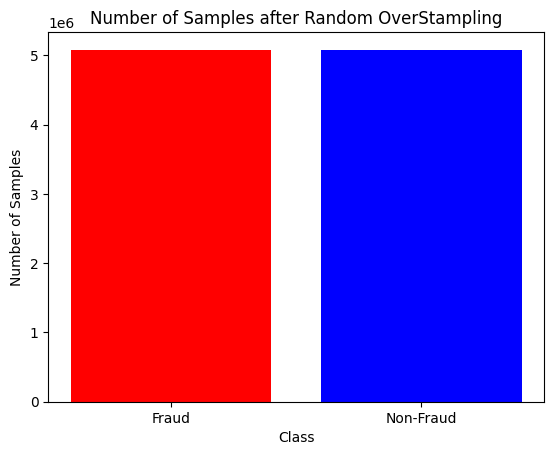

In [30]:
# Tính toán số lượng mẫu trong mỗi lớp
fraud_count = np.sum(y_ranOS == 1)
non_fraud_count = np.sum(y_ranOS == 0)

# Vẽ biểu đồ cột
plt.bar(['Fraud', 'Non-Fraud'], [fraud_count, non_fraud_count], color=['red', 'blue'])
plt.title('Number of Samples after Random OverStampling')
plt.xlabel('Class')
plt.ylabel('Number of Samples')

# Hiển thị biểu đồ
plt.show()

#### 3. SMOTE

In [31]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import TomekLinks

In [32]:
sm = SMOTE(random_state = 42)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [33]:
counter = Counter(y_smote)
print("After SMOTE: ", counter)

After SMOTE:  Counter({0: 5083093, 1: 5083093})


#### 3. SMOTE + Tomek
##### SMOTE (Synthetic Minority Over-sampling Technique)
 - SMOTE is an oversampling technique designed to address the issue of imbalanced data by creating synthetic samples from the minority class. SMOTE works as follows:

    1. Select Minority Samples: For each sample in the minority class, SMOTE selects a specified number of nearest neighbors.
    2. Generate Synthetic Samples: SMOTE generates new data points by interpolating between the selected sample and its nearest neighbors. These new data points are added to the minority class to balance the data.
##### Tomek 
 - Tomek Links is an under-sampling technique used to clean data by removing noisy samples, especially those from the majority class that are near the decision boundary. This helps to create a clearer decision boundary.
    1. Identify Tomek Links pairs: A pair (x, y) is called a Tomek Link if x and y are each other's nearest neighbors but belong to different classes.
    2. Remove samples: If a sample belongs to the minority class, keep it; if it belongs to the majority class, remove it.


In [34]:
sm = SMOTE(random_state = 42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [35]:
counter = Counter(y_resampled)
print("After SMOTE: ", counter)

After SMOTE:  Counter({0: 5083093, 1: 5083093})


In [36]:
# Bước 2: Áp dụng TOMEK Links
tomek = TomekLinks()
X_resampled_tomek, y_resampled_tomek = tomek.fit_resample(X_resampled, y_resampled)

In [37]:
print("After Tomek: ", Counter(y_resampled_tomek))

After Tomek:  Counter({0: 5083093, 1: 5082594})


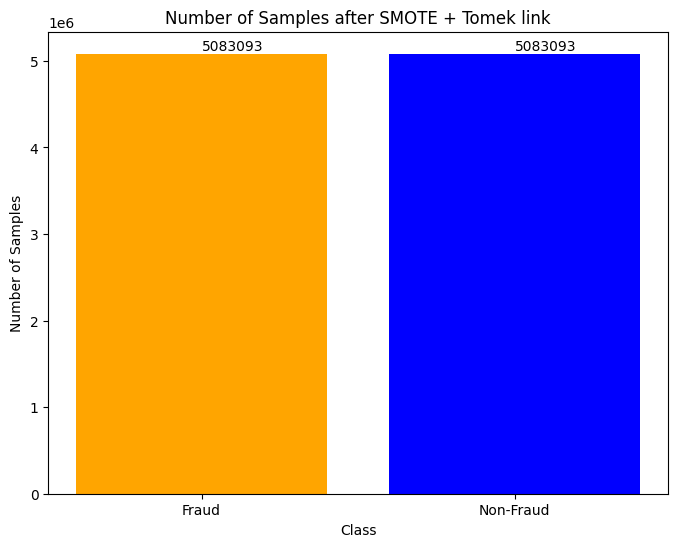

In [38]:
fraud_count = np.sum(y_resampled == 1)
non_fraud_count = np.sum(y_resampled == 0)

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
bars = plt.bar(['Fraud', 'Non-Fraud'], [fraud_count, non_fraud_count], color=['orange', 'blue'])

# Thêm giá trị lên đầu mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')  # va: vertical alignment

plt.title('Number of Samples after SMOTE + Tomek link')
plt.xlabel('Class')
plt.ylabel('Number of Samples')

# Hiển thị biểu đồ
plt.show()

## Step 5: Use RandomForest, LogisticRegression and MLP to evaluate dataset

### 1: RandomForest

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [40]:
def RandomF_data(X_train, y_train, X_test, y_test):
    
    # X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Khởi tạo mô hình và huấn luyện
    ROS_Model = RandomForestClassifier(random_state=42)
    ROS_Model.fit(X_train, y_train)
    
    print("Training Successfully!")
    
    # Printing F1 Score for Training Data

    print("Scoring for Training Dataset")
    yT_predict = ROS_Model.predict(X_train)
    print("Classification Report - Training Dataset: ", classification_report(y_train, yT_predict))
    
    cf_matrix_train = confusion_matrix(y_train, yT_predict)
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cf_matrix_train, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle("Confusion Matrix of Training Dataset", color="red", fontsize=16)
    ax.set(xlabel="Predicted Label", ylabel="Actual Label")
    plt.show()


    # Printing F1 Score for Training Data

    print("Scoring for Testing Dataset")
    yTe_predict = ROS_Model.predict(X_test)
    print("Classification Report - Testing Dataset: ", classification_report(y_test, yTe_predict))
    
    cf_matrix_train = confusion_matrix(y_test, yTe_predict)
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cf_matrix_train, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle("Confusion Matrix of Testing Dataset", color="red", fontsize=16)
    ax.set(xlabel="Predicted Label", ylabel="Actual Label")
    plt.show()
    
    # Printing Accuracy for Testing Data
    accuracy = accuracy_score(y_test, yTe_predict)
    print(f"Accuracy for Testing Dataset: {accuracy:.4f}")


#### a. Imbalanced Dataset

Training Successfully!
Scoring for Training Dataset
Classification Report - Training Dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083093
           1       1.00      1.00      1.00      6568

    accuracy                           1.00   5089661
   macro avg       1.00      1.00      1.00   5089661
weighted avg       1.00      1.00      1.00   5089661



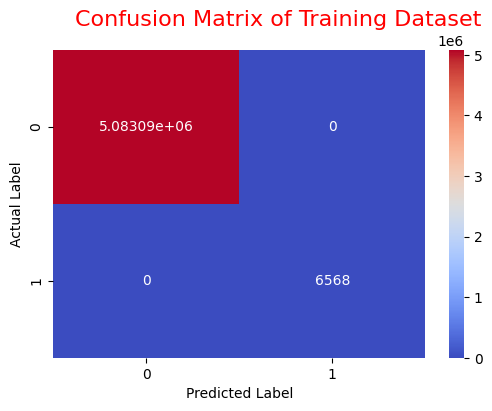

Scoring for Testing Dataset
Classification Report - Testing Dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270787
           1       0.99      0.77      0.87      1629

    accuracy                           1.00   1272416
   macro avg       0.99      0.89      0.93   1272416
weighted avg       1.00      1.00      1.00   1272416



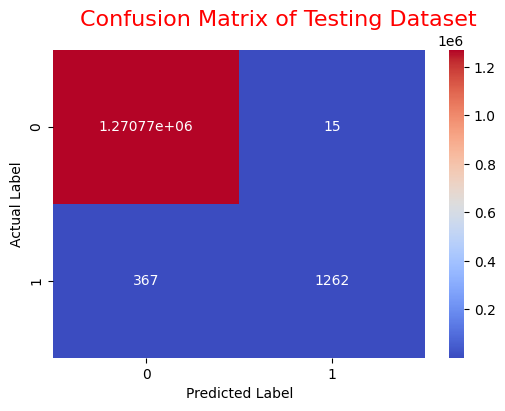

Accuracy for Testing Dataset: 0.9997


In [104]:
RandomF_data(X_train=X_train, y_train=y_train, y_test=y_test, X_test=X_test)

#### b. RandomOverStampling Dataset

Training Successfully!
Scoring for Training Dataset
Classification Report - Training Dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083093
           1       1.00      1.00      1.00   5083093

    accuracy                           1.00  10166186
   macro avg       1.00      1.00      1.00  10166186
weighted avg       1.00      1.00      1.00  10166186



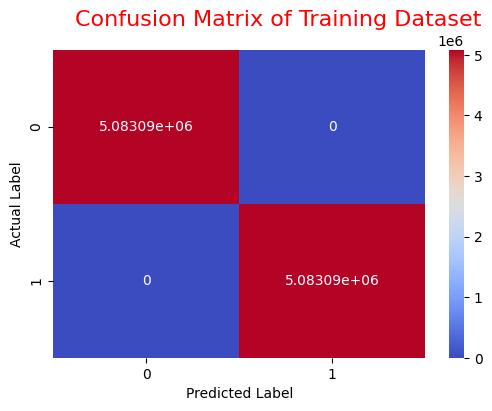

Scoring for Testing Dataset
Classification Report - Testing Dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270787
           1       0.97      0.80      0.88      1629

    accuracy                           1.00   1272416
   macro avg       0.98      0.90      0.94   1272416
weighted avg       1.00      1.00      1.00   1272416



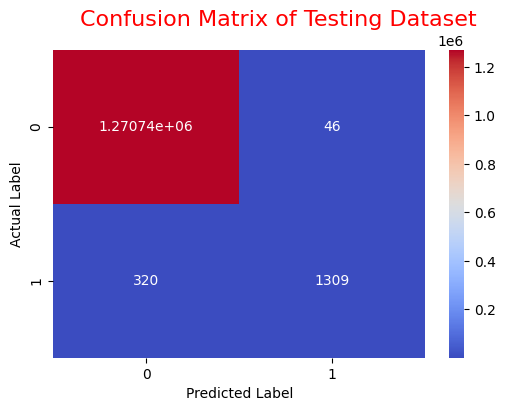

Accuracy for Testing Dataset: 0.9997


In [105]:
RandomF_data(X_ranOS, y_ranOS, X_test, y_test)

#### c. SMOTE

Training Successfully!
Scoring for Training Dataset
Classification Report - Training Dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083093
           1       1.00      1.00      1.00   5083093

    accuracy                           1.00  10166186
   macro avg       1.00      1.00      1.00  10166186
weighted avg       1.00      1.00      1.00  10166186



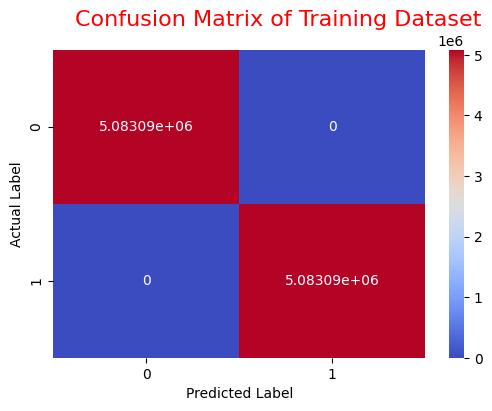

Scoring for Testing Dataset
Classification Report - Testing Dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270787
           1       0.66      0.95      0.78      1629

    accuracy                           1.00   1272416
   macro avg       0.83      0.97      0.89   1272416
weighted avg       1.00      1.00      1.00   1272416



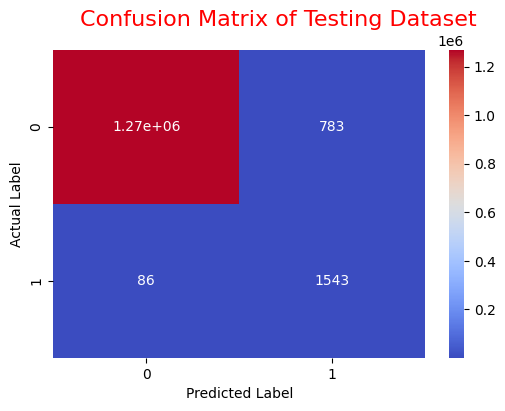

Accuracy for Testing Dataset: 0.9993


In [106]:
RandomF_data(X_smote, y_smote, X_test, y_test)

#### d. SMOTE + Tomek Dataset

Training Successfully!
Scoring for Training Dataset
Classification Report - Training Dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083093
           1       1.00      1.00      1.00   5082594

    accuracy                           1.00  10165687
   macro avg       1.00      1.00      1.00  10165687
weighted avg       1.00      1.00      1.00  10165687



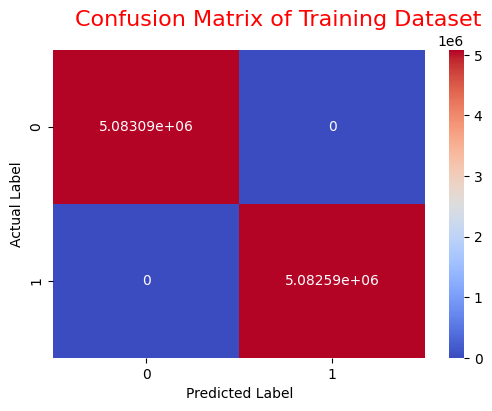

Scoring for Testing Dataset
Classification Report - Testing Dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270787
           1       0.66      0.95      0.78      1629

    accuracy                           1.00   1272416
   macro avg       0.83      0.97      0.89   1272416
weighted avg       1.00      1.00      1.00   1272416



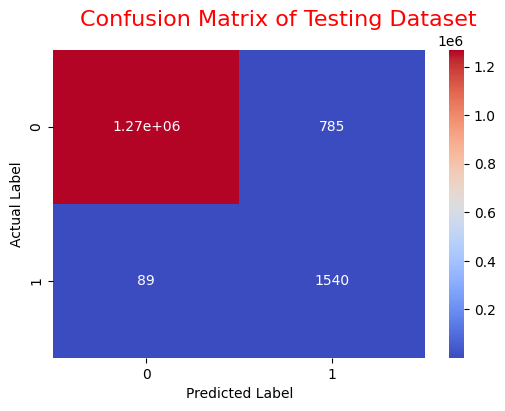

Accuracy for Testing Dataset: 0.9993


In [107]:
RandomF_data(X_train=X_resampled_tomek, y_train=y_resampled_tomek, X_test=X_test, y_test=y_test)


In [41]:
from sklearn.metrics import precision_recall_curve

In [49]:
def RandomF_data_2(X_train, y_train, X_test, y_test):
    # Khởi tạo mô hình và huấn luyện
    ROS_Model = RandomForestClassifier(random_state=42)
    ROS_Model.fit(X_train, y_train)
    
    print("Training Successfully!")
    
    # In kết quả phân loại cho dữ liệu huấn luyện
    print("Scoring for Training Dataset")
    yT_predict = ROS_Model.predict(X_train)
    print("Classification Report - Training Dataset: ", classification_report(y_train, yT_predict))
    
    cf_matrix_train = confusion_matrix(y_train, yT_predict)
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cf_matrix_train, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle("Confusion Matrix of Training Dataset", color="red", fontsize=16)
    ax.set(xlabel="Predicted Label", ylabel="Actual Label")
    plt.show()

    # Dự đoán xác suất trên tập kiểm tra
    probabilities = ROS_Model.predict_proba(X_test)[:, 1]

    # Tính toán các chỉ số precision, recall và ngưỡng
    precisions, recalls, thresholds = precision_recall_curve(y_test, probabilities)

    # Tìm ngưỡng tốt nhất để tối đa hóa F1-score
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
    optimal_threshold = thresholds[np.argmax(f1_scores)]

    print(f'Optimal threshold: {optimal_threshold}')

    # Áp dụng ngưỡng mới và đánh giá kết quả
    predictions = (probabilities >= optimal_threshold).astype(int)

    print("Scoring for Testing Dataset")
    print("Classification Report - Testing Dataset: ", classification_report(y_test, predictions))
    
    cf_matrix_test = confusion_matrix(y_test, predictions)
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cf_matrix_test, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle("Confusion Matrix of Testing Dataset", color="red", fontsize=16)
    ax.set(xlabel="Predicted Label", ylabel="Actual Label")
    plt.show()

    # In độ chính xác cho dữ liệu kiểm tra
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy for Testing Dataset: {accuracy:.4f}")

Training Successfully!
Scoring for Training Dataset
Classification Report - Training Dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083093
           1       1.00      1.00      1.00   5082594

    accuracy                           1.00  10165687
   macro avg       1.00      1.00      1.00  10165687
weighted avg       1.00      1.00      1.00  10165687



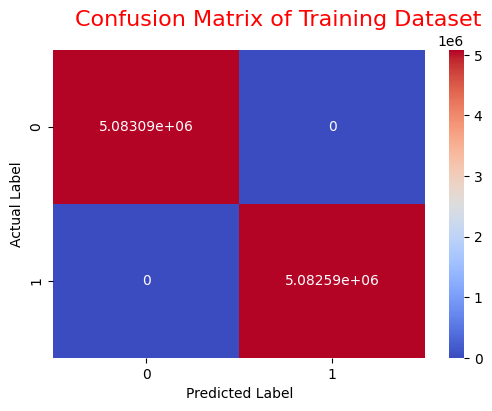

Optimal threshold: 0.89
Scoring for Testing Dataset
Classification Report - Testing Dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270787
           1       0.93      0.84      0.88      1629

    accuracy                           1.00   1272416
   macro avg       0.96      0.92      0.94   1272416
weighted avg       1.00      1.00      1.00   1272416



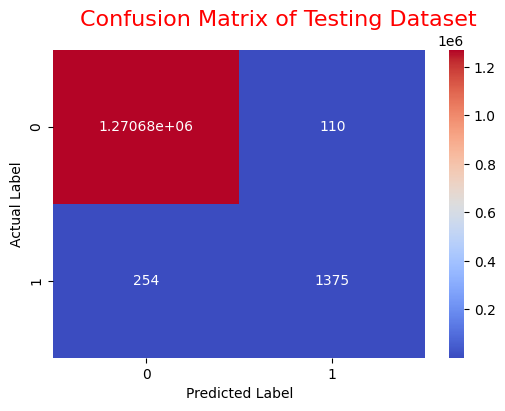

Accuracy for Testing Dataset: 0.9997


In [50]:
RandomF_data_2(X_resampled_tomek, y_resampled_tomek, X_test, y_test)

### 2: DecisionTree

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
def DecisionTree_data(X_train, y_train, X_test, y_test):
    # Khởi tạo mô hình và huấn luyện
    DT_Model = DecisionTreeClassifier(random_state=42)
    DT_Model.fit(X_train, y_train)
    
    print("Training Successfully!")
    
    # Printing F1 Score for Training Data
    print("Scoring for Training Dataset")
    yT_predict = DT_Model.predict(X_train)
    print("Classification Report - Training Dataset: ", classification_report(y_train, yT_predict))
    
    cf_matrix_train = confusion_matrix(y_train, yT_predict)
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cf_matrix_train, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle("Confusion Matrix of Training Dataset", color="red", fontsize=16)
    ax.set(xlabel="Predicted Label", ylabel="Actual Label")
    plt.show()

    # Printing F1 Score for Testing Data
    print("Scoring for Testing Dataset")
    yTe_predict = DT_Model.predict(X_test)
    print("Classification Report - Testing Dataset: ", classification_report(y_test, yTe_predict))
    
    cf_matrix_test = confusion_matrix(y_test, yTe_predict)
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cf_matrix_test, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle("Confusion Matrix of Testing Dataset", color="red", fontsize=16)
    ax.set(xlabel="Predicted Label", ylabel="Actual Label")
    plt.show()
    
    # Printing Accuracy for Testing Data
    accuracy = accuracy_score(y_test, yTe_predict)
    print(f"Accuracy for Testing Dataset: {accuracy:.4f}")

#### a. Imbalanced Dataset

Training Successfully!
Scoring for Training Dataset
Classification Report - Training Dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083093
           1       1.00      1.00      1.00      6568

    accuracy                           1.00   5089661
   macro avg       1.00      1.00      1.00   5089661
weighted avg       1.00      1.00      1.00   5089661



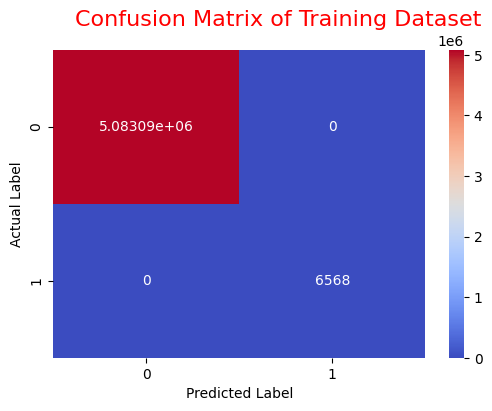

Scoring for Testing Dataset
Classification Report - Testing Dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270787
           1       0.91      0.87      0.89      1629

    accuracy                           1.00   1272416
   macro avg       0.95      0.93      0.94   1272416
weighted avg       1.00      1.00      1.00   1272416



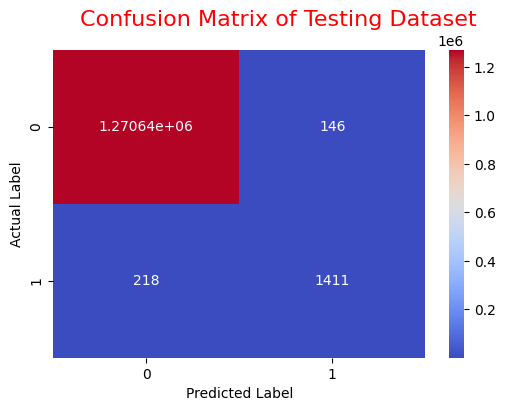

Accuracy for Testing Dataset: 0.9997


In [110]:
DecisionTree_data(X_train, y_train, X_test, y_test)

#### b. RandomOverSampling Dataset

Training Successfully!
Scoring for Training Dataset
Classification Report - Training Dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083093
           1       1.00      1.00      1.00   5083093

    accuracy                           1.00  10166186
   macro avg       1.00      1.00      1.00  10166186
weighted avg       1.00      1.00      1.00  10166186



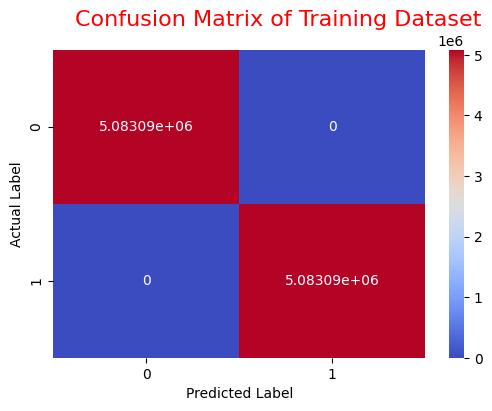

Scoring for Testing Dataset
Classification Report - Testing Dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270787
           1       0.90      0.85      0.87      1629

    accuracy                           1.00   1272416
   macro avg       0.95      0.93      0.94   1272416
weighted avg       1.00      1.00      1.00   1272416



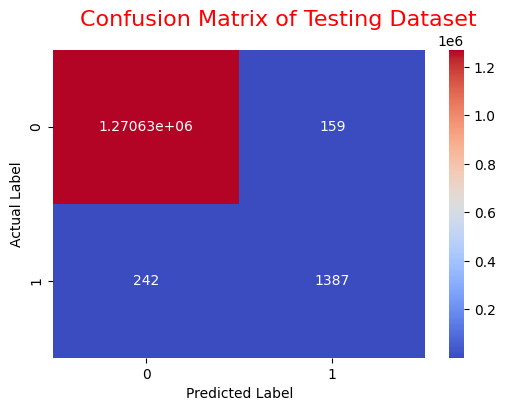

Accuracy for Testing Dataset: 0.9997


In [111]:
DecisionTree_data(X_ranOS, y_ranOS, X_test, y_test)

#### c. SMOTE

Training Successfully!
Scoring for Training Dataset
Classification Report - Training Dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083093
           1       1.00      1.00      1.00   5083093

    accuracy                           1.00  10166186
   macro avg       1.00      1.00      1.00  10166186
weighted avg       1.00      1.00      1.00  10166186



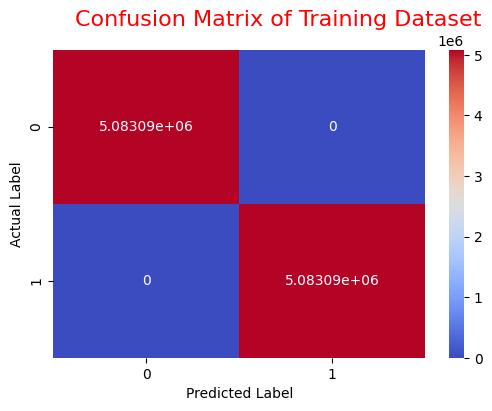

Scoring for Testing Dataset
Classification Report - Testing Dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270787
           1       0.71      0.97      0.82      1629

    accuracy                           1.00   1272416
   macro avg       0.86      0.98      0.91   1272416
weighted avg       1.00      1.00      1.00   1272416



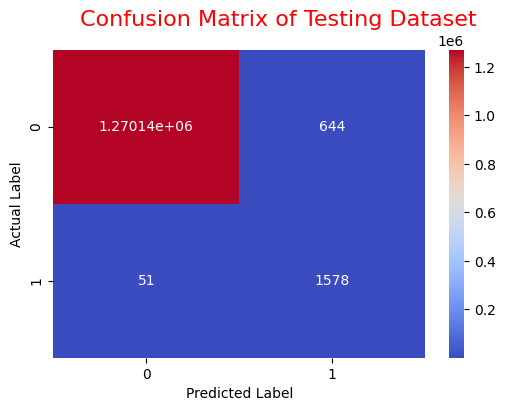

Accuracy for Testing Dataset: 0.9995


In [112]:
DecisionTree_data(X_smote, y_smote, X_test, y_test)

#### d. SMOTE + Tomek Dataset

Training Successfully!
Scoring for Training Dataset
Classification Report - Training Dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083093
           1       1.00      1.00      1.00   5082594

    accuracy                           1.00  10165687
   macro avg       1.00      1.00      1.00  10165687
weighted avg       1.00      1.00      1.00  10165687



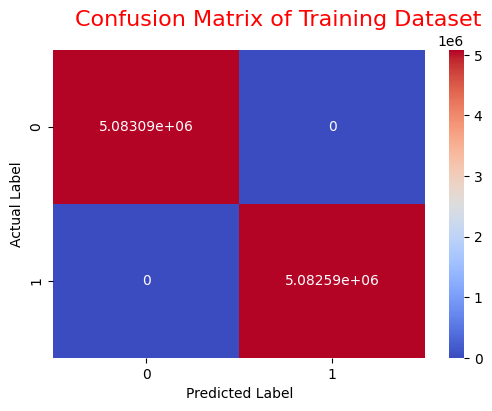

Scoring for Testing Dataset
Classification Report - Testing Dataset:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270787
           1       0.71      0.97      0.82      1629

    accuracy                           1.00   1272416
   macro avg       0.86      0.98      0.91   1272416
weighted avg       1.00      1.00      1.00   1272416



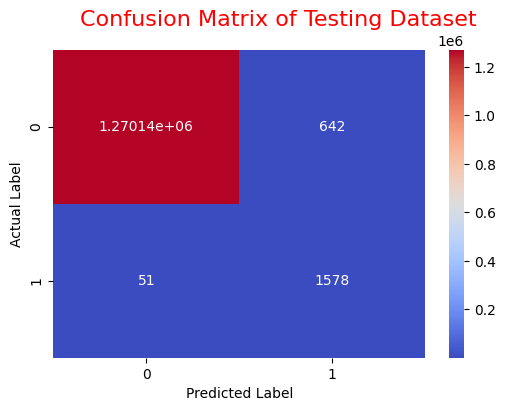

Accuracy for Testing Dataset: 0.9995


In [113]:
DecisionTree_data(X_resampled_tomek, y_resampled_tomek, X_test, y_test)

### 3: MLP

In [114]:
from sklearn.neural_network import MLPClassifier

In [115]:
def MLP_data(X_train, y_train, X_test, y_test):
    # Split the dataset into training and testing sets
    # X_train_SE, X_test_SE, y_train_SE, y_test_SE = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the MLP model
    MLP_Model_SE = MLPClassifier(random_state=42, max_iter=300)
    MLP_Model_SE.fit(X_train, y_train)
    
    print("Training Successfully!")
    
    # Scoring for Training Dataset
    print("Scoring for Training Dataset")
    yT_predict_SE = MLP_Model_SE.predict(X_train)
    print("Classification Report - Training Dataset: ")
    print(classification_report(y_train, yT_predict_SE))
    
    cf_matrix_train_SE = confusion_matrix(y_train, yT_predict_SE)
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cf_matrix_train_SE, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle("Confusion Matrix of Training Dataset", color="red", fontsize=16)
    ax.set(xlabel="Predicted Label", ylabel="Actual Label")
    plt.show()

    # Scoring for Testing Dataset
    print("Scoring for Testing Dataset")
    yTe_predict_SE = MLP_Model_SE.predict(X_test)
    print("Classification Report - Testing Dataset: ")
    print(classification_report(y_test, yTe_predict_SE))
    
    cf_matrix_test_SE = confusion_matrix(y_test, yTe_predict_SE)
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cf_matrix_test_SE, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle("Confusion Matrix of Testing Dataset", color="red", fontsize=16)
    ax.set(xlabel="Predicted Label", ylabel="Actual Label")
    plt.show()

    # Calculate and print F1 Score for Testing Dataset
    f1_mlp = f1_score(y_test, yTe_predict_SE)
    print(f"F1 Score for MLP: {f1_mlp}")
    
    # Printing Accuracy for Testing Data
    accuracy = accuracy_score(y_test, yTe_predict_SE)
    print(f"Accuracy for Testing Dataset: {accuracy:.4f}")

#### a. Imbalanced Dataset

Training Successfully!
Scoring for Training Dataset
Classification Report - Training Dataset: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083093
           1       0.34      0.41      0.37      6568

    accuracy                           1.00   5089661
   macro avg       0.67      0.70      0.68   5089661
weighted avg       1.00      1.00      1.00   5089661



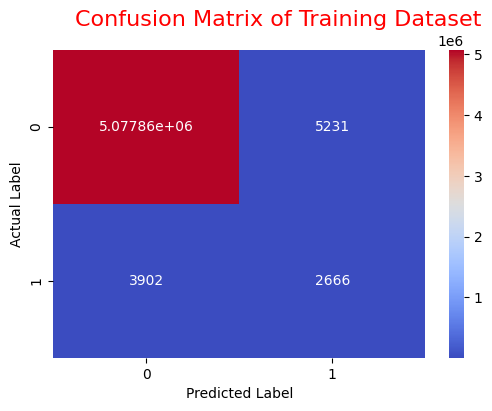

Scoring for Testing Dataset
Classification Report - Testing Dataset: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270787
           1       0.32      0.39      0.35      1629

    accuracy                           1.00   1272416
   macro avg       0.66      0.70      0.68   1272416
weighted avg       1.00      1.00      1.00   1272416



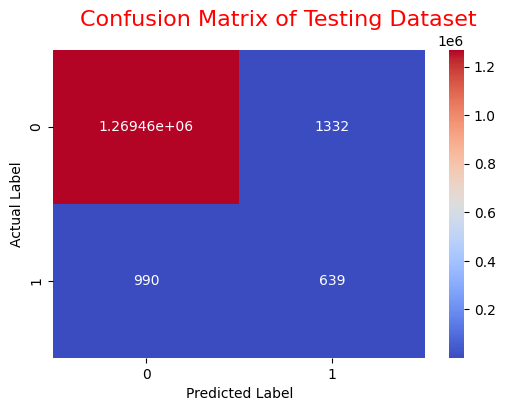

F1 Score for MLP: 0.355
Accuracy for Testing Dataset: 0.9982


In [116]:
MLP_data(X_train, y_train, X_test, y_test)

#### b. RandomOverStampling Dataset

Training Successfully!
Scoring for Training Dataset
Classification Report - Training Dataset: 
              precision    recall  f1-score   support

           0       0.87      1.00      0.93   5083093
           1       1.00      0.85      0.92   5083093

    accuracy                           0.92  10166186
   macro avg       0.93      0.92      0.92  10166186
weighted avg       0.93      0.92      0.92  10166186



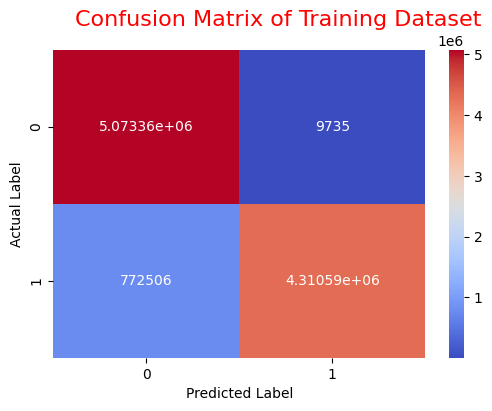

Scoring for Testing Dataset
Classification Report - Testing Dataset: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270787
           1       0.36      0.83      0.51      1629

    accuracy                           1.00   1272416
   macro avg       0.68      0.91      0.75   1272416
weighted avg       1.00      1.00      1.00   1272416



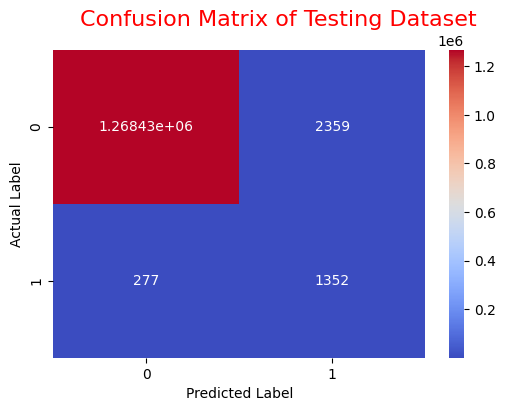

F1 Score for MLP: 0.5063670411985018
Accuracy for Testing Dataset: 0.9979


In [117]:
MLP_data(X_ranOS, y_ranOS, X_test, y_test)

#### c. SMOTE

Training Successfully!
Scoring for Training Dataset
Classification Report - Training Dataset: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99   5083093
           1       0.99      0.99      0.99   5083093

    accuracy                           0.99  10166186
   macro avg       0.99      0.99      0.99  10166186
weighted avg       0.99      0.99      0.99  10166186



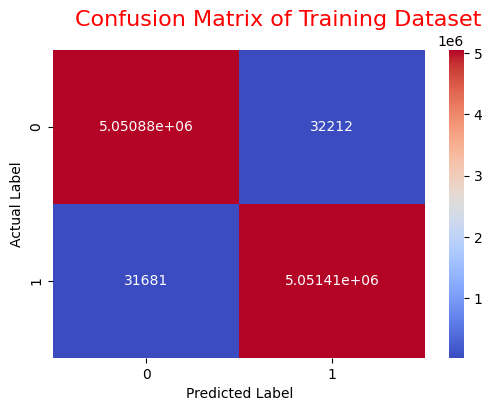

Scoring for Testing Dataset
Classification Report - Testing Dataset: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270787
           1       0.17      0.99      0.28      1629

    accuracy                           0.99   1272416
   macro avg       0.58      0.99      0.64   1272416
weighted avg       1.00      0.99      1.00   1272416



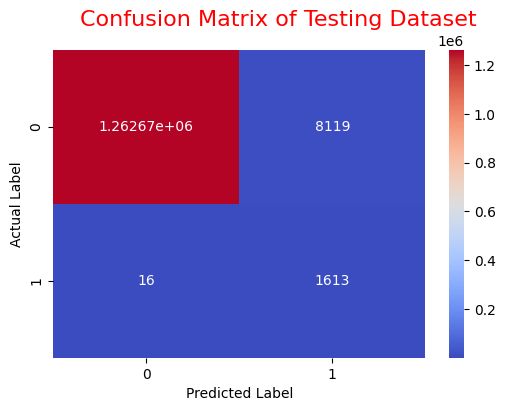

F1 Score for MLP: 0.2839538772995335
Accuracy for Testing Dataset: 0.9936


In [118]:
MLP_data(X_smote, y_smote, X_test, y_test)

#### d. SMOTE + Tomek Dataset

Training Successfully!
Scoring for Training Dataset
Classification Report - Training Dataset: 
              precision    recall  f1-score   support

           0       0.91      0.99      0.95   5083093
           1       0.99      0.91      0.95   5082594

    accuracy                           0.95  10165687
   macro avg       0.95      0.95      0.95  10165687
weighted avg       0.95      0.95      0.95  10165687



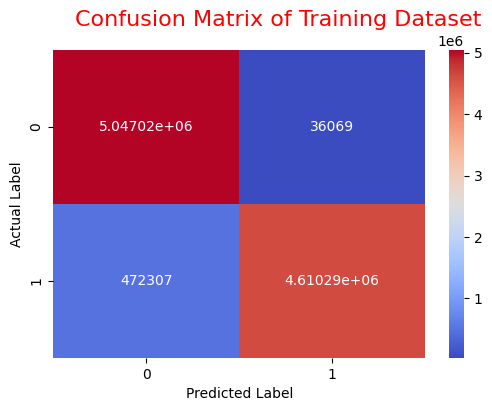

Scoring for Testing Dataset
Classification Report - Testing Dataset: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270787
           1       0.14      0.89      0.24      1629

    accuracy                           0.99   1272416
   macro avg       0.57      0.94      0.62   1272416
weighted avg       1.00      0.99      1.00   1272416



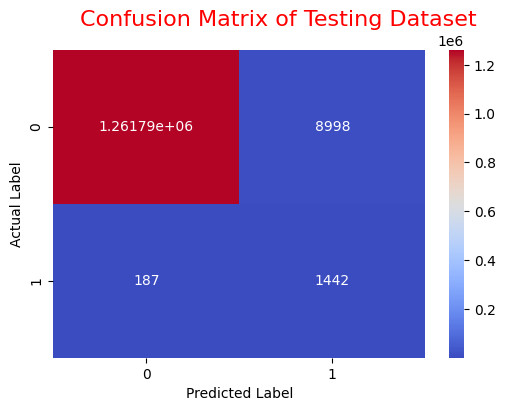

F1 Score for MLP: 0.23895931725909356
Accuracy for Testing Dataset: 0.9928


In [119]:
MLP_data(X_resampled_tomek, y_resampled_tomek, X_test, y_test)

## Step 6: Using new improvements

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.cluster import Birch
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Birch


In [51]:
def tomek_links_undersampling(X, y):
    tl = TomekLinks(sampling_strategy='auto')
    X_res, y_res = tl.fit_resample(X, y)
    return X_res, y_res

In [53]:
def incremental_birch_clustering_borderline_smote(X, y, n_clusters=10, threshold=0.1, batch_size=5000, min_samples=6):
    brc = Birch(n_clusters=n_clusters, threshold=threshold)

    X_res = []
    y_res = []

    for start in range(0, X.shape[0], batch_size):
        end = min(start + batch_size, X.shape[0])
        X_batch = X[start:end]
        y_batch = y[start:end]

        X_clusters = brc.fit_predict(X_batch)

        for cluster in np.unique(X_clusters):
            X_cluster = X_batch[X_clusters == cluster]
            y_cluster = y_batch[X_clusters == cluster]

            if len(X_cluster) >= min_samples:  # Ensure cluster has enough samples
                if len(set(y_cluster)) > 1:  # Only resample clusters with both classes
                    # Dynamically set the k_neighbors parameter based on cluster size
                    k_neighbors = min(len(X_cluster) - 1, 5)
                    sm = BorderlineSMOTE(sampling_strategy='minority', k_neighbors=k_neighbors, kind='borderline-1')

                    try:
                        X_resampled, y_resampled = sm.fit_resample(X_cluster, y_cluster)
                        X_res.append(X_resampled)
                        y_res.append(y_resampled)
                    except ValueError as e:
                        print(f"Skipping cluster {cluster} due to error: {e}")
                        X_res.append(X_cluster)
                        y_res.append(y_cluster)
                else:
                    X_res.append(X_cluster)
                    y_res.append(y_cluster)
            else:
                print(f"Skipping cluster {cluster} due to insufficient samples: {len(X_cluster)}")
                X_res.append(X_cluster)
                y_res.append(y_cluster)

    X_res = np.vstack(X_res)
    y_res = np.hstack(y_res)

    return X_res, y_res

step 1  

In [57]:
# Step 1: Tomek Links Undersampling
X_tomek_1, y_tomek_1 = tomek_links_undersampling(X_train, y_train)
print('After Tomek Links Undersampling:', Counter(y_tomek_1))

After Tomek Links Undersampling: Counter({0: 5082112, 1: 6568})


In [58]:
# Step 2: BIRCH Clustering and Borderline SMOTE
X_birch_smote, y_birch_smote = incremental_birch_clustering_borderline_smote(X_tomek_1, y_tomek_1  , n_clusters=10, threshold=0.1, batch_size=5000)
print('After BIRCH Clustering Borderline SMOTE:', Counter(y_birch_smote))

Skipping cluster 3 due to insufficient samples: 2
Skipping cluster 7 due to insufficient samples: 1
Skipping cluster 9 due to insufficient samples: 2
Skipping cluster 4 due to error: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 5, n_samples = 4
Skipping cluster 5 due to insufficient samples: 3
Skipping cluster 2 due to error: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 2, n_samples = 2
Skipping cluster 5 due to insufficient samples: 1
Skipping cluster 7 due to error: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 4, n_samples = 2
Skipping cluster 1 due to insufficient samples: 4
Skipping cluster 4 due to error: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 3, n_samples = 1
Skipping cluster 7 due to insufficient samples: 1
Skipping cluster 8 due to insufficient samples: 1
Skipping cluster 5 due to insufficient samples: 1
Skipping cluster 6 due to insufficient samples

In [59]:
# Huấn luyện mô hình trên tập dữ liệu đã được cân bằng
clf = RandomForestClassifier(random_state=42)
clf.fit(X_birch_smote, y_birch_smote)

# Dự đoán và đánh giá
y_pred = clf.predict(X_test)

# In ra các chỉ số đánh giá
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Confusion Matrix:
[[1270260     527]
 [    164    1465]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270787
           1       0.74      0.90      0.81      1629

    accuracy                           1.00   1272416
   macro avg       0.87      0.95      0.90   1272416
weighted avg       1.00      1.00      1.00   1272416


Accuracy Score:
0.9994569386112718
